天池大赛

零基础入门金融风控-贷款违约预测

https://tianchi.aliyun.com/competition/entrance/531830/information

In [2]:
import pandas
import numpy
import matplotlib.pyplot

In [2]:
#在线数据 无需下载
# train_url='http://aliyuntianchiresult.cn-hangzhou.oss.aliyun-inc.com/file/race/documents/531830/train.csv?Expires=1599954909&OSSAccessKeyId=LTAILBoOl5drlflK&Signature=tu3%2F%2FkRQzmC%2BFvVx2Zezu%2FoIzpI%3D&response-content-disposition=attachment%3B%20'
#离线数据 可提前下载好
import pandas
train_url='C:/Users/wade z shao/OneDrive - PwC China/downloads/train.csv'
# train_url='C:/Users/wade/Downloads/train.csv'
train=pandas.read_csv(train_url)
train.head(5)

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [3]:
#在线数据 无需下载
# testA_url='http://aliyuntianchiresult.cn-hangzhou.oss.aliyun-inc.com/file/race/documents/531830/testA.csv?Expires=1599955258&OSSAccessKeyId=LTAILBoOl5drlflK&Signature=O25NvtTQu0Onw6eVIBeWYvByqlk%3D&response-content-disposition=attachment%3B%20'
#离线数据 可提前下载好
import pandas
# testA_url='C:/Users/wade/Downloads/testA.csv'
testA_url='C:/Users/wade z shao/OneDrive - PwC China/downloads/testA.csv'
testA=pandas.read_csv(testA_url)
# testA

## 数据预处理

In [5]:
#缺失值


# train=train.dropna()
# train=train.drop_duplicates()
# train

In [4]:
# cv='http://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531795/mchar_train.json'
# cv=pandas.read_json(cv)
# cv.head(100)

<AxesSubplot:xlabel='totalAcc'>

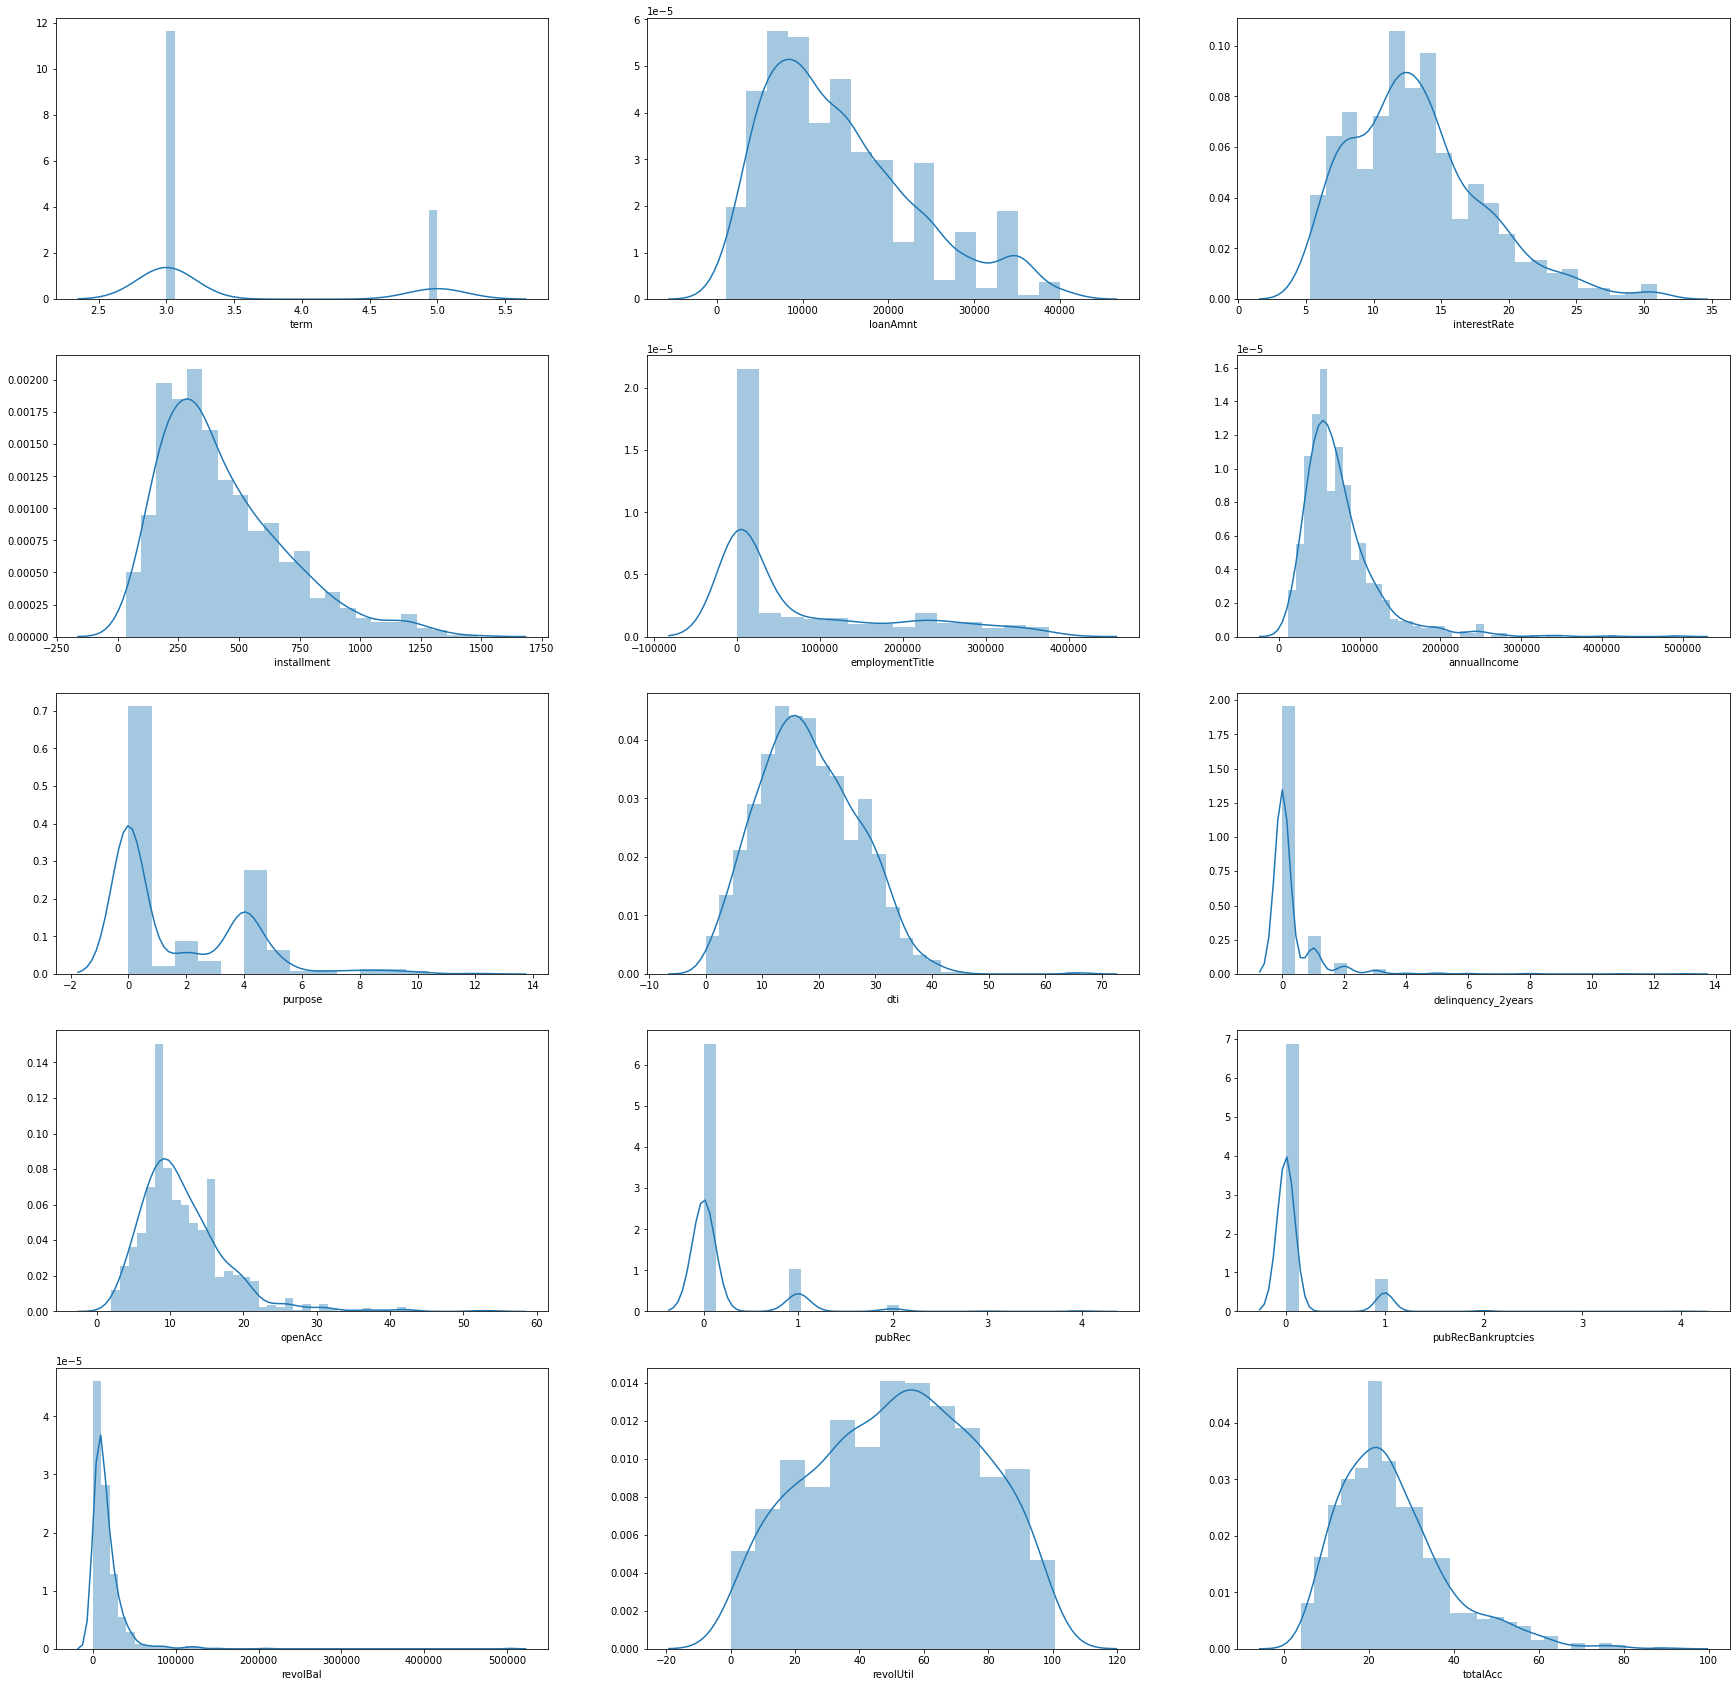

In [53]:
import seaborn
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,30))
train=train.iloc[:1000]
plt.subplot(5,3,1)
seaborn.distplot(train['term'])
plt.subplot(5,3,2)
seaborn.distplot(train['loanAmnt'])
plt.subplot(5,3,3)
seaborn.distplot(train['interestRate'])
plt.subplot(5,3,4)
seaborn.distplot(train['installment'])
plt.subplot(5,3,5)
seaborn.distplot(train['employmentTitle'])
plt.subplot(5,3,6)
seaborn.distplot(train['annualIncome'])
plt.subplot(5,3,7)
seaborn.distplot(train['purpose'])
plt.subplot(5,3,8)
seaborn.distplot(train['dti'])
plt.subplot(5,3,9)
seaborn.distplot(train['delinquency_2years'])
plt.subplot(5,3,10)
seaborn.distplot(train['openAcc'])
plt.subplot(5,3,11)
seaborn.distplot(train['pubRec'])
plt.subplot(5,3,12)
seaborn.distplot(train['pubRecBankruptcies'])
plt.subplot(5,3,13)
seaborn.distplot(train['revolBal'])
plt.subplot(5,3,14)
seaborn.distplot(train['revolUtil'])
plt.subplot(5,3,15)
seaborn.distplot(train['totalAcc'])


In [37]:
# import seaborn
# seaborn.distplot(train['term'])

In [38]:
# import seaborn
# seaborn.distplot(train['loanAmnt'])

In [40]:
# import seaborn
# seaborn.distplot(train['interestRate'])

In [41]:
# import seaborn
# seaborn.distplot(train['installment'])#分期付款金额

In [13]:
# import seaborn
# seaborn.distplot(train['grade'])#需数据转换

In [42]:
# import seaborn
# seaborn.distplot(train['employmentTitle'])

In [16]:
# import seaborn
# seaborn.distplot(train['employmentLength'])#需数据转换

In [43]:
# import seaborn
# seaborn.distplot(train['annualIncome'])

In [44]:
# import seaborn
# seaborn.distplot(train['purpose'])

In [45]:
# import seaborn
# seaborn.distplot(train['dti'])

In [46]:
# import seaborn
# seaborn.distplot(train['delinquency_2years'])

In [47]:
# import seaborn
# seaborn.distplot(train['openAcc'])

In [48]:
# import seaborn
# seaborn.distplot(train['pubRec'])

In [49]:
# import seaborn
# seaborn.distplot(train['pubRecBankruptcies'])

In [50]:
# import seaborn
# seaborn.distplot(train['revolBal'])

In [51]:
# import seaborn
# seaborn.distplot(train['revolUtil'])

In [52]:
# import seaborn
# seaborn.distplot(train['totalAcc'])

<AxesSubplot:xlabel='n13'>

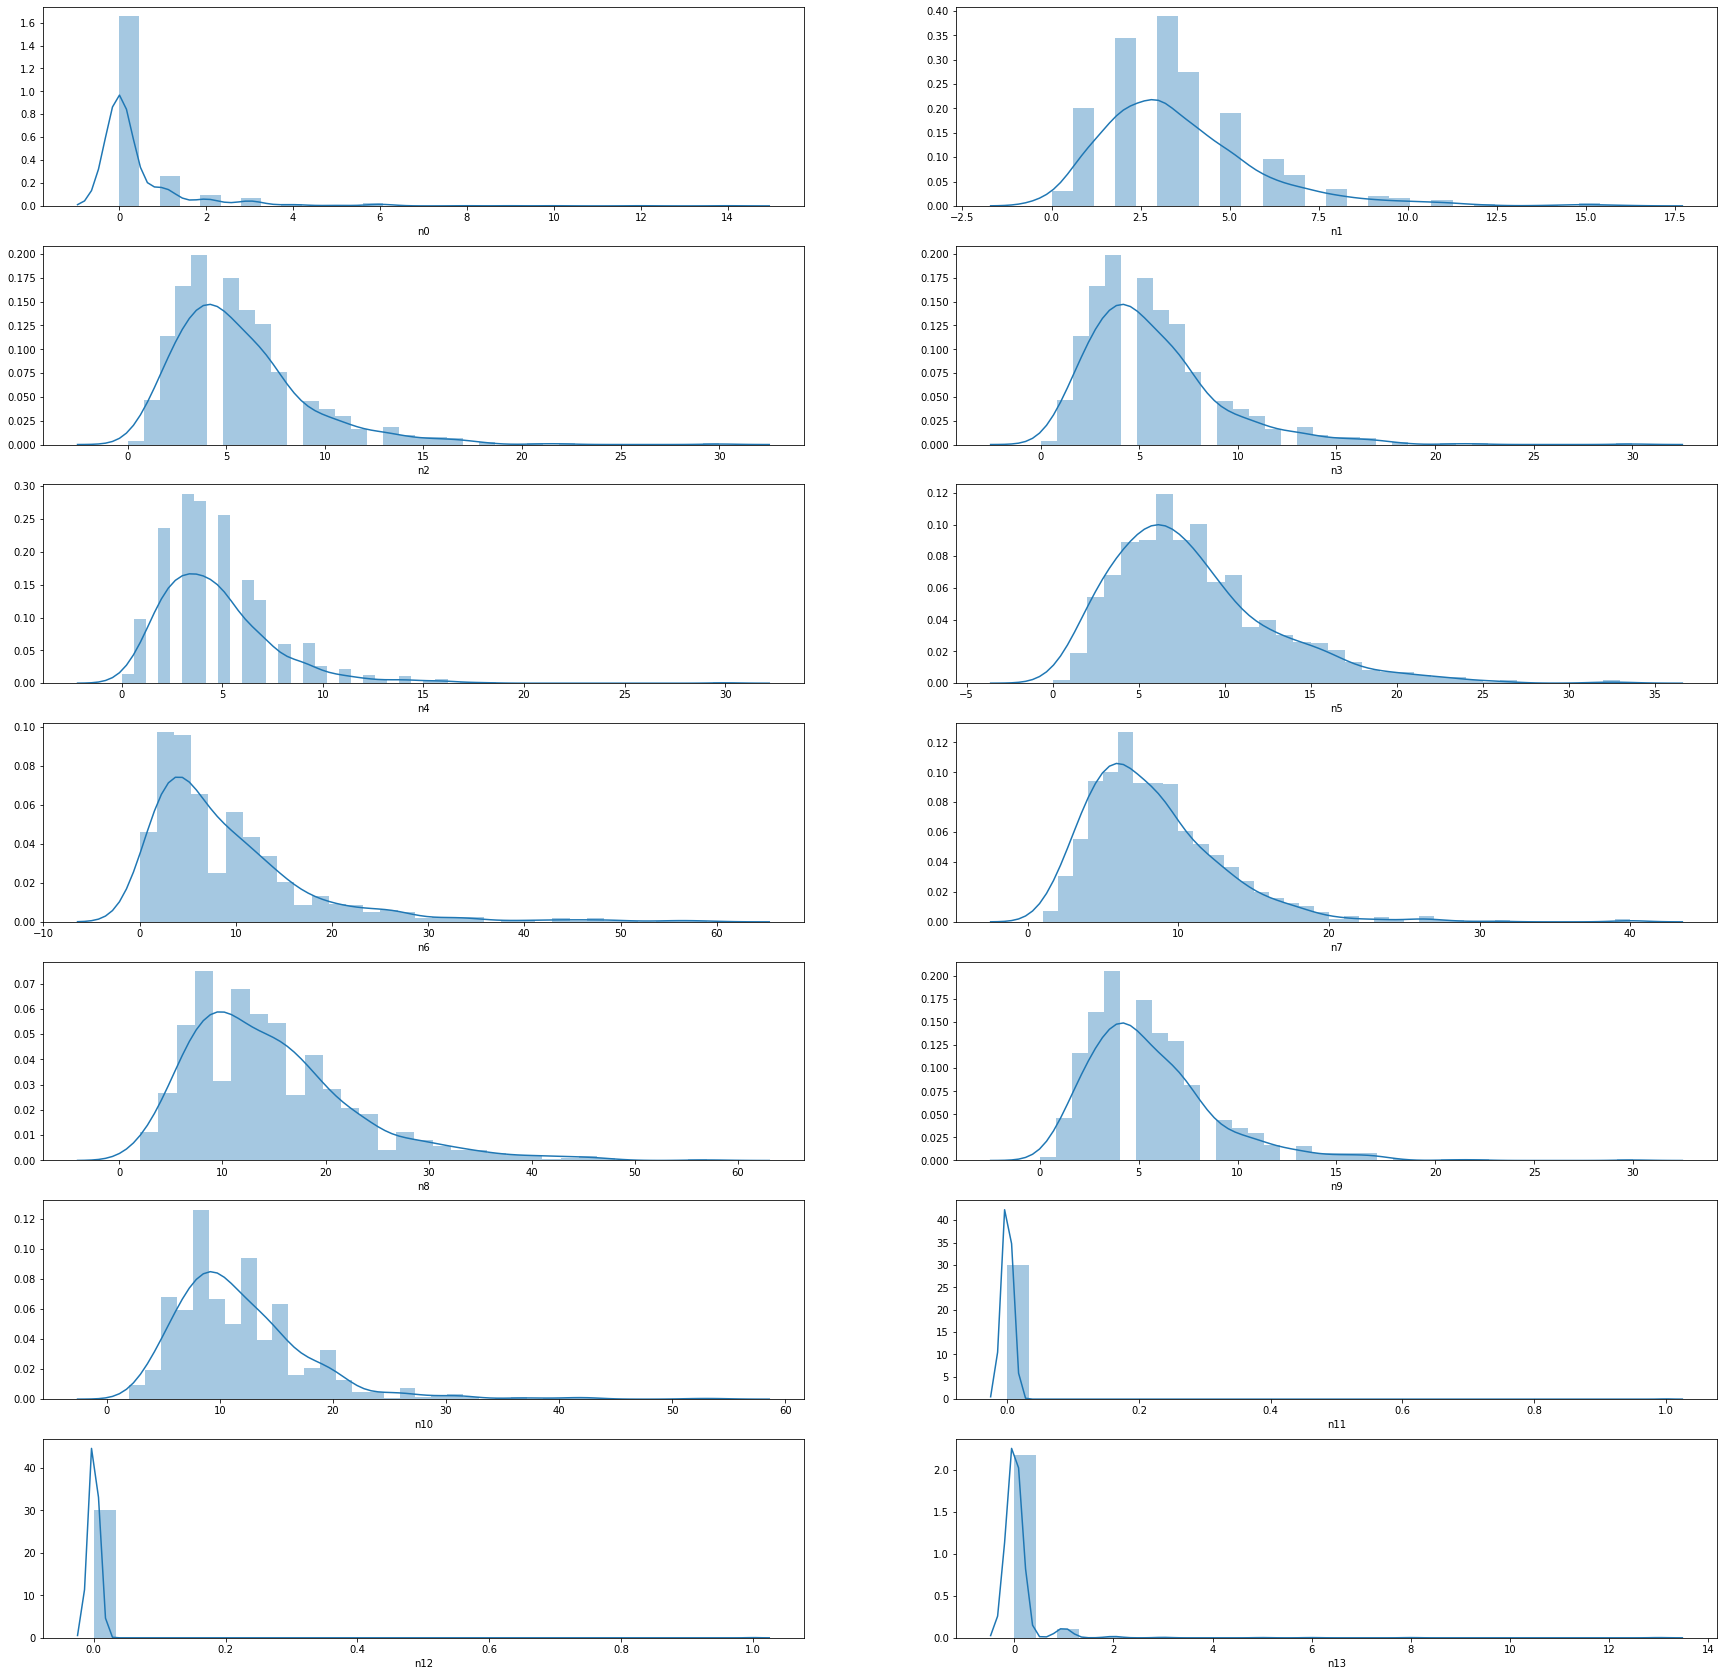

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,30))
plt.subplot(7,2,1)
train=train.iloc[:1000]
seaborn.distplot(train['n0'])
plt.subplot(7,2,2)
seaborn.distplot(train['n1'])
plt.subplot(7,2,3)
seaborn.distplot(train['n2'])
plt.subplot(7,2,4)
seaborn.distplot(train['n3'])
plt.subplot(7,2,5)
seaborn.distplot(train['n4'])
plt.subplot(7,2,6)
seaborn.distplot(train['n5'])
plt.subplot(7,2,7)
seaborn.distplot(train['n6'])
plt.subplot(7,2,8)
seaborn.distplot(train['n7'])
plt.subplot(7,2,9)
seaborn.distplot(train['n8'])
plt.subplot(7,2,10)
seaborn.distplot(train['n9'])
plt.subplot(7,2,11)
seaborn.distplot(train['n10'])
plt.subplot(7,2,12)
seaborn.distplot(train['n11'])
plt.subplot(7,2,13)
seaborn.distplot(train['n12'])
plt.subplot(7,2,14)
seaborn.distplot(train['n13'])

### 以下内容非本次内容
为tensorflow的测试

In [11]:
import tensorflow as tf;
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(-739.8683, shape=(), dtype=float32)


In [12]:
import tensorflow as tf;
print(tf.reduce_sum(tf.random.normal([10, 10])))

tf.Tensor(15.009447, shape=(), dtype=float32)


In [13]:
import tensorflow as tf;
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(48.259888, shape=(), dtype=float32)
